In [1]:
path_model_outputs = r'P:\watmodel\CWATM\Saudi_Arabia\Outputs\Historical\\'
path_observed_data = 'C:/GitHub/FUSE/Data_forNotebooks/WaterTable/'
Inputs_file_modflow = r'P:\watmodel\CWATM\Saudi_Arabia\Modflow\2500m\\'

# Groundwater

Presenting simulation results related to groundwater alongside observations. 

✔️ update the file paths above <br>
⏩ Run with the black and white fast-forward icon above.

### Groundwater depth

CWatM is coupled with the groundwater model Modflow. Water flows into the subsurface through four processes:
1. through the soil layer, 
2. through riverbeds, 
3. through preferential root paths, and 
4. through reservoir & canal leakage. 

Water flows out of the subsurface through three processes: 
1. pumping, 
2. baseflow into rivers, and 
3. capillarly rise into the soil.

In [2]:
## Importing Python modules
import numpy as np
import xarray as xr
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xlrd
from datetime import datetime
import rasterio

import plotly.express as px

plt.rcParams['figure.figsize'] = [14, 8.0]


## Importing paths
# Where CWATM results are stored
#path_model_outputs = 'C:/CWatM_output/' #_Examples/CWatM_output_09Sept_GabConductivity/'
# Where observed data are stored

#path_observed_data = 'C:\GitHub\FUSE\Data_forNotebooks\WaterTable/'
# Where ModFlow inputs for the grid are stored


## Loading files containing basin grid information
#Size = np.loadtxt(Inputs_file_modflow + 'UB_limits.txt')
#res_ModFlow = (Size[1]-Size[0])/(Size[5]-1)  # in [m]

#basin = np.loadtxt(Inputs_file_modflow + 'Basin_limits.txt')

# Map dimensions
#ncol = int((Size[1]-Size[0])/res_ModFlow)+1 
#nrow = int(abs((Size[3]-Size[2])/res_ModFlow)+1)
#nrow=566 #MS
         # ModFlow format

In [4]:
## Upload simulated maps from the netcdf files
#ds = xr.open_dataset(path_model_outputs + 'modflowWaterLevel_monthend.nc')
ds = xr.open_dataset(path_model_outputs + 'modflow_watertable[1]_monthend.nc')

#GWTable_ModFlow = ds['modflowWaterLevel_monthend'][:].data # Array of water levels [m] (time, nrow, ncol)
GWTable_ModFlow = ds['modflow_watertable[1]_monthend'][:].data # Array of water levels [m] (time, nrow, ncol)
Time_ModFlow = ds['time'][:].data
Time_ModFlowV2 = (Time_ModFlow - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
Time_ModFlowV3 = np.zeros(len(Time_ModFlow))
for it in range(len(Time_ModFlow)):
    dd = datetime.utcfromtimestamp(Time_ModFlowV2[it])
    Time_ModFlowV3[it] = dd.toordinal()
ds.close()


ncol = np.shape(GWTable_ModFlow)[2]
nrow = np.shape(GWTable_ModFlow)[1]
#Size = [322283, 2150401]
res_ModFlow = 2500 #changeResolution
#Size = [304654.5-res_ModFlow/2, 2157367.688+res_ModFlow/2]
#Size = [304654.5, 2157367.688] #250m
Size = [304654.5, 2157617.688] #500m
print('ModFlow resolution is : ', res_ModFlow, ' meters')

with rasterio.open(Inputs_file_modflow + 'modflow_basin.tif', 'r') as src:
    basin = src.read(1).astype(np.bool)  # read in as 2-dimensional array (nrows, ncols).
basin = basin * 1  # to have 0 and 1 instead of False and True

#basin = basin.reshape(nrow,ncol)     

## Upload topography defined in ModFlow and soil thickness defined in CWATM
ds = xr.open_dataset(path_model_outputs + 'modflowtotalSoilThickness_totalend.nc')
Soil_thickness = ds['modflowtotalSoilThickness_totalend'][:].data 
ds.close()

with rasterio.open(Inputs_file_modflow + 'elevation_modflow.tif', 'r') as src:
    topography = src.read(1).astype(np.float32)
with rasterio.open(Inputs_file_modflow + 'modlfow_river_percentage.tif', 'r') as src:
    modflow_riverpercentage = src.read(1).astype(np.float32)

#! Top = np.loadtxt(Inputs_file_modflow + 'Topo.txt')
#! Topography_ModFlow = Top.reshape(nrow,ncol) + Soil_thickness # We need to add soil thickness to compare WTD

#Soil_thickness = np.where(lakeArea_modflow <= 0, np.where(modflow_riverpercentage > 0, 1.5, Soil_thickness), Soil_thickness)
Topography_ModFlow = topography #- Soil_thickness

C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\2998869095.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  Time_ModFlowV2 = (Time_ModFlow - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


ModFlow resolution is :  2500  meters


C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\2998869095.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  basin = src.read(1).astype(np.bool)  # read in as 2-dimensional array (nrows, ncols).


## Plot the time-average simulated groundwater map and the total groundwater storage evolution

C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\3638587568.py:7: RuntimeWarning: Mean of empty slice
  plt.imshow((np.nanmean(GWTable_ModFlow[-2*12:],0)-np.nanmean(GWTable_ModFlow[0:2*12],0)), cmap=cmap,
C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\3638587568.py:18: RuntimeWarning: Mean of empty slice
  plt.plot_date(Time_ModFlowV3, np.nanmean(np.nanmean(Topography_ModFlow - GWTable_ModFlow,1),1),
C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\3638587568.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(Time_ModFlowV3, np.nanmean(np.nanmean(Topography_ModFlow - GWTable_ModFlow,1),1),
C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\3638587568.py:27: RuntimeWarning: Mean of empty slice
  print(np.nanmean(np.nanmean(Topography_ModFlow - GWTable_ModFlow[i:],1),1))


[160.71838 160.72775 160.7803  160.81668 160.86171 160.89073 160.92046
 160.8958  160.85757 160.80084 160.80183 160.80658 160.83545 160.89018
 160.9537  160.98708 161.0415  161.07237 161.09842 161.08795 161.04604
 160.98752 160.95969 160.97151 161.02844 161.06287 161.13406 161.16638
 161.21986 161.2465  161.28053 161.27742 161.20996 161.17355 161.167
 161.15924 161.17303 161.22438 161.29083 161.33847 161.3938  161.41399
 161.44063 161.43611 161.37103 161.34586 161.3628  161.34975 161.38792
 161.4377  161.49965 161.54422 161.59123 161.63368 161.67789 161.63979
 161.57918 161.54123 161.56195 161.56953 161.59735 161.64264 161.71368
 161.75182 161.81071 161.84015 161.86995 161.85567 161.82715 161.78075
 161.7866  161.79935 161.85628 161.90012 161.98004 162.017   162.05962
 162.10138 162.1347  162.10042 162.02415 161.98915 161.99547 162.001
 162.04216 162.08902 162.14299 162.1807  162.22939 162.27022 162.2921
 162.29953 162.23317 162.20071 162.21529 162.22235 162.25519 162.3051
 162.36066 1

[160.86171 160.89073 160.92046 160.8958  160.85757 160.80084 160.80183
 160.80658 160.83545 160.89018 160.9537  160.98708 161.0415  161.07237
 161.09842 161.08795 161.04604 160.98752 160.95969 160.97151 161.02844
 161.06287 161.13406 161.16638 161.21986 161.2465  161.28053 161.27742
 161.20996 161.17355 161.167   161.15924 161.17303 161.22438 161.29083
 161.33847 161.3938  161.41399 161.44063 161.43611 161.37103 161.34586
 161.3628  161.34975 161.38792 161.4377  161.49965 161.54422 161.59123
 161.63368 161.67789 161.63979 161.57918 161.54123 161.56195 161.56953
 161.59735 161.64264 161.71368 161.75182 161.81071 161.84015 161.86995
 161.85567 161.82715 161.78075 161.7866  161.79935 161.85628 161.90012
 161.98004 162.017   162.05962 162.10138 162.1347  162.10042 162.02415
 161.98915 161.99547 162.001   162.04216 162.08902 162.14299 162.1807
 162.22939 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529
 162.22235 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021
 162.537

[160.85757 160.80084 160.80183 160.80658 160.83545 160.89018 160.9537
 160.98708 161.0415  161.07237 161.09842 161.08795 161.04604 160.98752
 160.95969 160.97151 161.02844 161.06287 161.13406 161.16638 161.21986
 161.2465  161.28053 161.27742 161.20996 161.17355 161.167   161.15924
 161.17303 161.22438 161.29083 161.33847 161.3938  161.41399 161.44063
 161.43611 161.37103 161.34586 161.3628  161.34975 161.38792 161.4377
 161.49965 161.54422 161.59123 161.63368 161.67789 161.63979 161.57918
 161.54123 161.56195 161.56953 161.59735 161.64264 161.71368 161.75182
 161.81071 161.84015 161.86995 161.85567 161.82715 161.78075 161.7866
 161.79935 161.85628 161.90012 161.98004 162.017   162.05962 162.10138
 162.1347  162.10042 162.02415 161.98915 161.99547 162.001   162.04216
 162.08902 162.14299 162.1807  162.22939 162.27022 162.2921  162.29953
 162.23317 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066
 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719
 162.46158

[160.83545 160.89018 160.9537  160.98708 161.0415  161.07237 161.09842
 161.08795 161.04604 160.98752 160.95969 160.97151 161.02844 161.06287
 161.13406 161.16638 161.21986 161.2465  161.28053 161.27742 161.20996
 161.17355 161.167   161.15924 161.17303 161.22438 161.29083 161.33847
 161.3938  161.41399 161.44063 161.43611 161.37103 161.34586 161.3628
 161.34975 161.38792 161.4377  161.49965 161.54422 161.59123 161.63368
 161.67789 161.63979 161.57918 161.54123 161.56195 161.56953 161.59735
 161.64264 161.71368 161.75182 161.81071 161.84015 161.86995 161.85567
 161.82715 161.78075 161.7866  161.79935 161.85628 161.90012 161.98004
 162.017   162.05962 162.10138 162.1347  162.10042 162.02415 161.98915
 161.99547 162.001   162.04216 162.08902 162.14299 162.1807  162.22939
 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529 162.22235
 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021  162.53769
 162.5383  162.48457 162.4719  162.46158 162.46999 162.49866 162.53514
 162.60

[161.0415  161.07237 161.09842 161.08795 161.04604 160.98752 160.95969
 160.97151 161.02844 161.06287 161.13406 161.16638 161.21986 161.2465
 161.28053 161.27742 161.20996 161.17355 161.167   161.15924 161.17303
 161.22438 161.29083 161.33847 161.3938  161.41399 161.44063 161.43611
 161.37103 161.34586 161.3628  161.34975 161.38792 161.4377  161.49965
 161.54422 161.59123 161.63368 161.67789 161.63979 161.57918 161.54123
 161.56195 161.56953 161.59735 161.64264 161.71368 161.75182 161.81071
 161.84015 161.86995 161.85567 161.82715 161.78075 161.7866  161.79935
 161.85628 161.90012 161.98004 162.017   162.05962 162.10138 162.1347
 162.10042 162.02415 161.98915 161.99547 162.001   162.04216 162.08902
 162.14299 162.1807  162.22939 162.27022 162.2921  162.29953 162.23317
 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066 162.40627
 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719  162.46158
 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082 162.73679
 162.772

[161.04604 160.98752 160.95969 160.97151 161.02844 161.06287 161.13406
 161.16638 161.21986 161.2465  161.28053 161.27742 161.20996 161.17355
 161.167   161.15924 161.17303 161.22438 161.29083 161.33847 161.3938
 161.41399 161.44063 161.43611 161.37103 161.34586 161.3628  161.34975
 161.38792 161.4377  161.49965 161.54422 161.59123 161.63368 161.67789
 161.63979 161.57918 161.54123 161.56195 161.56953 161.59735 161.64264
 161.71368 161.75182 161.81071 161.84015 161.86995 161.85567 161.82715
 161.78075 161.7866  161.79935 161.85628 161.90012 161.98004 162.017
 162.05962 162.10138 162.1347  162.10042 162.02415 161.98915 161.99547
 162.001   162.04216 162.08902 162.14299 162.1807  162.22939 162.27022
 162.2921  162.29953 162.23317 162.20071 162.21529 162.22235 162.25519
 162.3051  162.36066 162.40627 162.47041 162.5021  162.53769 162.5383
 162.48457 162.4719  162.46158 162.46999 162.49866 162.53514 162.60287
 162.64412 162.71082 162.73679 162.77267 162.76302 162.70673 162.68166
 162.70357

[161.06287 161.13406 161.16638 161.21986 161.2465  161.28053 161.27742
 161.20996 161.17355 161.167   161.15924 161.17303 161.22438 161.29083
 161.33847 161.3938  161.41399 161.44063 161.43611 161.37103 161.34586
 161.3628  161.34975 161.38792 161.4377  161.49965 161.54422 161.59123
 161.63368 161.67789 161.63979 161.57918 161.54123 161.56195 161.56953
 161.59735 161.64264 161.71368 161.75182 161.81071 161.84015 161.86995
 161.85567 161.82715 161.78075 161.7866  161.79935 161.85628 161.90012
 161.98004 162.017   162.05962 162.10138 162.1347  162.10042 162.02415
 161.98915 161.99547 162.001   162.04216 162.08902 162.14299 162.1807
 162.22939 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529
 162.22235 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021
 162.53769 162.5383  162.48457 162.4719  162.46158 162.46999 162.49866
 162.53514 162.60287 162.64412 162.71082 162.73679 162.77267 162.76302
 162.70673 162.68166 162.70357 162.71336 162.72852 162.78235 162.86237
 162.899

[161.2465  161.28053 161.27742 161.20996 161.17355 161.167   161.15924
 161.17303 161.22438 161.29083 161.33847 161.3938  161.41399 161.44063
 161.43611 161.37103 161.34586 161.3628  161.34975 161.38792 161.4377
 161.49965 161.54422 161.59123 161.63368 161.67789 161.63979 161.57918
 161.54123 161.56195 161.56953 161.59735 161.64264 161.71368 161.75182
 161.81071 161.84015 161.86995 161.85567 161.82715 161.78075 161.7866
 161.79935 161.85628 161.90012 161.98004 162.017   162.05962 162.10138
 162.1347  162.10042 162.02415 161.98915 161.99547 162.001   162.04216
 162.08902 162.14299 162.1807  162.22939 162.27022 162.2921  162.29953
 162.23317 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066
 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719
 162.46158 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082
 162.73679 162.77267 162.76302 162.70673 162.68166 162.70357 162.71336
 162.72852 162.78235 162.86237 162.89993 162.96045 162.9913  163.01938
 163.0210

[161.17355 161.167   161.15924 161.17303 161.22438 161.29083 161.33847
 161.3938  161.41399 161.44063 161.43611 161.37103 161.34586 161.3628
 161.34975 161.38792 161.4377  161.49965 161.54422 161.59123 161.63368
 161.67789 161.63979 161.57918 161.54123 161.56195 161.56953 161.59735
 161.64264 161.71368 161.75182 161.81071 161.84015 161.86995 161.85567
 161.82715 161.78075 161.7866  161.79935 161.85628 161.90012 161.98004
 162.017   162.05962 162.10138 162.1347  162.10042 162.02415 161.98915
 161.99547 162.001   162.04216 162.08902 162.14299 162.1807  162.22939
 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529 162.22235
 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021  162.53769
 162.5383  162.48457 162.4719  162.46158 162.46999 162.49866 162.53514
 162.60287 162.64412 162.71082 162.73679 162.77267 162.76302 162.70673
 162.68166 162.70357 162.71336 162.72852 162.78235 162.86237 162.89993
 162.96045 162.9913  163.01938 163.02106 162.96468 162.92104 162.94597
 162.93

[161.29083 161.33847 161.3938  161.41399 161.44063 161.43611 161.37103
 161.34586 161.3628  161.34975 161.38792 161.4377  161.49965 161.54422
 161.59123 161.63368 161.67789 161.63979 161.57918 161.54123 161.56195
 161.56953 161.59735 161.64264 161.71368 161.75182 161.81071 161.84015
 161.86995 161.85567 161.82715 161.78075 161.7866  161.79935 161.85628
 161.90012 161.98004 162.017   162.05962 162.10138 162.1347  162.10042
 162.02415 161.98915 161.99547 162.001   162.04216 162.08902 162.14299
 162.1807  162.22939 162.27022 162.2921  162.29953 162.23317 162.20071
 162.21529 162.22235 162.25519 162.3051  162.36066 162.40627 162.47041
 162.5021  162.53769 162.5383  162.48457 162.4719  162.46158 162.46999
 162.49866 162.53514 162.60287 162.64412 162.71082 162.73679 162.77267
 162.76302 162.70673 162.68166 162.70357 162.71336 162.72852 162.78235
 162.86237 162.89993 162.96045 162.9913  163.01938 163.02106 162.96468
 162.92104 162.94597 162.93695 162.98343 163.03331 163.08101 163.12508
 163.1

[161.37103 161.34586 161.3628  161.34975 161.38792 161.4377  161.49965
 161.54422 161.59123 161.63368 161.67789 161.63979 161.57918 161.54123
 161.56195 161.56953 161.59735 161.64264 161.71368 161.75182 161.81071
 161.84015 161.86995 161.85567 161.82715 161.78075 161.7866  161.79935
 161.85628 161.90012 161.98004 162.017   162.05962 162.10138 162.1347
 162.10042 162.02415 161.98915 161.99547 162.001   162.04216 162.08902
 162.14299 162.1807  162.22939 162.27022 162.2921  162.29953 162.23317
 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066 162.40627
 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719  162.46158
 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082 162.73679
 162.77267 162.76302 162.70673 162.68166 162.70357 162.71336 162.72852
 162.78235 162.86237 162.89993 162.96045 162.9913  163.01938 163.02106
 162.96468 162.92104 162.94597 162.93695 162.98343 163.03331 163.08101
 163.12508 163.1763  163.21555 163.23784 163.25041 163.19286 163.14201
 163.13

[161.49965 161.54422 161.59123 161.63368 161.67789 161.63979 161.57918
 161.54123 161.56195 161.56953 161.59735 161.64264 161.71368 161.75182
 161.81071 161.84015 161.86995 161.85567 161.82715 161.78075 161.7866
 161.79935 161.85628 161.90012 161.98004 162.017   162.05962 162.10138
 162.1347  162.10042 162.02415 161.98915 161.99547 162.001   162.04216
 162.08902 162.14299 162.1807  162.22939 162.27022 162.2921  162.29953
 162.23317 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066
 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719
 162.46158 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082
 162.73679 162.77267 162.76302 162.70673 162.68166 162.70357 162.71336
 162.72852 162.78235 162.86237 162.89993 162.96045 162.9913  163.01938
 163.02106 162.96468 162.92104 162.94597 162.93695 162.98343 163.03331
 163.08101 163.12508 163.1763  163.21555 163.23784 163.25041 163.19286
 163.14201 163.13821 163.141   163.18141 163.23672 163.29216 163.33205
 163.384

[161.57918 161.54123 161.56195 161.56953 161.59735 161.64264 161.71368
 161.75182 161.81071 161.84015 161.86995 161.85567 161.82715 161.78075
 161.7866  161.79935 161.85628 161.90012 161.98004 162.017   162.05962
 162.10138 162.1347  162.10042 162.02415 161.98915 161.99547 162.001
 162.04216 162.08902 162.14299 162.1807  162.22939 162.27022 162.2921
 162.29953 162.23317 162.20071 162.21529 162.22235 162.25519 162.3051
 162.36066 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457
 162.4719  162.46158 162.46999 162.49866 162.53514 162.60287 162.64412
 162.71082 162.73679 162.77267 162.76302 162.70673 162.68166 162.70357
 162.71336 162.72852 162.78235 162.86237 162.89993 162.96045 162.9913
 163.01938 163.02106 162.96468 162.92104 162.94597 162.93695 162.98343
 163.03331 163.08101 163.12508 163.1763  163.21555 163.23784 163.25041
 163.19286 163.14201 163.13821 163.141   163.18141 163.23672 163.29216
 163.33205 163.38426 163.41873 163.44269 163.43695 163.3723  163.33694
 163.35864 

[161.71368 161.75182 161.81071 161.84015 161.86995 161.85567 161.82715
 161.78075 161.7866  161.79935 161.85628 161.90012 161.98004 162.017
 162.05962 162.10138 162.1347  162.10042 162.02415 161.98915 161.99547
 162.001   162.04216 162.08902 162.14299 162.1807  162.22939 162.27022
 162.2921  162.29953 162.23317 162.20071 162.21529 162.22235 162.25519
 162.3051  162.36066 162.40627 162.47041 162.5021  162.53769 162.5383
 162.48457 162.4719  162.46158 162.46999 162.49866 162.53514 162.60287
 162.64412 162.71082 162.73679 162.77267 162.76302 162.70673 162.68166
 162.70357 162.71336 162.72852 162.78235 162.86237 162.89993 162.96045
 162.9913  163.01938 163.02106 162.96468 162.92104 162.94597 162.93695
 162.98343 163.03331 163.08101 163.12508 163.1763  163.21555 163.23784
 163.25041 163.19286 163.14201 163.13821 163.141   163.18141 163.23672
 163.29216 163.33205 163.38426 163.41873 163.44269 163.43695 163.3723
 163.33694 163.35864 163.37111 163.39336 163.44868 163.51268 163.54715
 163.60367

[161.82715 161.78075 161.7866  161.79935 161.85628 161.90012 161.98004
 162.017   162.05962 162.10138 162.1347  162.10042 162.02415 161.98915
 161.99547 162.001   162.04216 162.08902 162.14299 162.1807  162.22939
 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529 162.22235
 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021  162.53769
 162.5383  162.48457 162.4719  162.46158 162.46999 162.49866 162.53514
 162.60287 162.64412 162.71082 162.73679 162.77267 162.76302 162.70673
 162.68166 162.70357 162.71336 162.72852 162.78235 162.86237 162.89993
 162.96045 162.9913  163.01938 163.02106 162.96468 162.92104 162.94597
 162.93695 162.98343 163.03331 163.08101 163.12508 163.1763  163.21555
 163.23784 163.25041 163.19286 163.14201 163.13821 163.141   163.18141
 163.23672 163.29216 163.33205 163.38426 163.41873 163.44269 163.43695
 163.3723  163.33694 163.35864 163.37111 163.39336 163.44868 163.51268
 163.54715 163.60367 163.63815 163.66965 163.64748 163.59265 163.54018
 163.5

[161.98004 162.017   162.05962 162.10138 162.1347  162.10042 162.02415
 161.98915 161.99547 162.001   162.04216 162.08902 162.14299 162.1807
 162.22939 162.27022 162.2921  162.29953 162.23317 162.20071 162.21529
 162.22235 162.25519 162.3051  162.36066 162.40627 162.47041 162.5021
 162.53769 162.5383  162.48457 162.4719  162.46158 162.46999 162.49866
 162.53514 162.60287 162.64412 162.71082 162.73679 162.77267 162.76302
 162.70673 162.68166 162.70357 162.71336 162.72852 162.78235 162.86237
 162.89993 162.96045 162.9913  163.01938 163.02106 162.96468 162.92104
 162.94597 162.93695 162.98343 163.03331 163.08101 163.12508 163.1763
 163.21555 163.23784 163.25041 163.19286 163.14201 163.13821 163.141
 163.18141 163.23672 163.29216 163.33205 163.38426 163.41873 163.44269
 163.43695 163.3723  163.33694 163.35864 163.37111 163.39336 163.44868
 163.51268 163.54715 163.60367 163.63815 163.66965 163.64748 163.59265
 163.54018 163.53752 163.56229 163.58893 163.64268 163.70753 163.75163
 163.81108 

[162.02415 161.98915 161.99547 162.001   162.04216 162.08902 162.14299
 162.1807  162.22939 162.27022 162.2921  162.29953 162.23317 162.20071
 162.21529 162.22235 162.25519 162.3051  162.36066 162.40627 162.47041
 162.5021  162.53769 162.5383  162.48457 162.4719  162.46158 162.46999
 162.49866 162.53514 162.60287 162.64412 162.71082 162.73679 162.77267
 162.76302 162.70673 162.68166 162.70357 162.71336 162.72852 162.78235
 162.86237 162.89993 162.96045 162.9913  163.01938 163.02106 162.96468
 162.92104 162.94597 162.93695 162.98343 163.03331 163.08101 163.12508
 163.1763  163.21555 163.23784 163.25041 163.19286 163.14201 163.13821
 163.141   163.18141 163.23672 163.29216 163.33205 163.38426 163.41873
 163.44269 163.43695 163.3723  163.33694 163.35864 163.37111 163.39336
 163.44868 163.51268 163.54715 163.60367 163.63815 163.66965 163.64748
 163.59265 163.54018 163.53752 163.56229 163.58893 163.64268 163.70753
 163.75163 163.81108 163.83873 163.86429 163.84438 163.81187 163.7597
 163.77

[162.14299 162.1807  162.22939 162.27022 162.2921  162.29953 162.23317
 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066 162.40627
 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719  162.46158
 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082 162.73679
 162.77267 162.76302 162.70673 162.68166 162.70357 162.71336 162.72852
 162.78235 162.86237 162.89993 162.96045 162.9913  163.01938 163.02106
 162.96468 162.92104 162.94597 162.93695 162.98343 163.03331 163.08101
 163.12508 163.1763  163.21555 163.23784 163.25041 163.19286 163.14201
 163.13821 163.141   163.18141 163.23672 163.29216 163.33205 163.38426
 163.41873 163.44269 163.43695 163.3723  163.33694 163.35864 163.37111
 163.39336 163.44868 163.51268 163.54715 163.60367 163.63815 163.66965
 163.64748 163.59265 163.54018 163.53752 163.56229 163.58893 163.64268
 163.70753 163.75163 163.81108 163.83873 163.86429 163.84438 163.81187
 163.7597  163.77545 163.79648 163.81586 163.87679 163.94879 163.97913
 164.0

[162.23317 162.20071 162.21529 162.22235 162.25519 162.3051  162.36066
 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457 162.4719
 162.46158 162.46999 162.49866 162.53514 162.60287 162.64412 162.71082
 162.73679 162.77267 162.76302 162.70673 162.68166 162.70357 162.71336
 162.72852 162.78235 162.86237 162.89993 162.96045 162.9913  163.01938
 163.02106 162.96468 162.92104 162.94597 162.93695 162.98343 163.03331
 163.08101 163.12508 163.1763  163.21555 163.23784 163.25041 163.19286
 163.14201 163.13821 163.141   163.18141 163.23672 163.29216 163.33205
 163.38426 163.41873 163.44269 163.43695 163.3723  163.33694 163.35864
 163.37111 163.39336 163.44868 163.51268 163.54715 163.60367 163.63815
 163.66965 163.64748 163.59265 163.54018 163.53752 163.56229 163.58893
 163.64268 163.70753 163.75163 163.81108 163.83873 163.86429 163.84438
 163.81187 163.7597  163.77545 163.79648 163.81586 163.87679 163.94879
 163.97913 164.03758 164.08487 164.1018  164.0902  164.0447  164.03227
 164.01

[162.36066 162.40627 162.47041 162.5021  162.53769 162.5383  162.48457
 162.4719  162.46158 162.46999 162.49866 162.53514 162.60287 162.64412
 162.71082 162.73679 162.77267 162.76302 162.70673 162.68166 162.70357
 162.71336 162.72852 162.78235 162.86237 162.89993 162.96045 162.9913
 163.01938 163.02106 162.96468 162.92104 162.94597 162.93695 162.98343
 163.03331 163.08101 163.12508 163.1763  163.21555 163.23784 163.25041
 163.19286 163.14201 163.13821 163.141   163.18141 163.23672 163.29216
 163.33205 163.38426 163.41873 163.44269 163.43695 163.3723  163.33694
 163.35864 163.37111 163.39336 163.44868 163.51268 163.54715 163.60367
 163.63815 163.66965 163.64748 163.59265 163.54018 163.53752 163.56229
 163.58893 163.64268 163.70753 163.75163 163.81108 163.83873 163.86429
 163.84438 163.81187 163.7597  163.77545 163.79648 163.81586 163.87679
 163.94879 163.97913 164.03758 164.08487 164.1018  164.0902  164.0447
 164.03227 164.01216 164.02083 164.07576 164.09113 164.15189 164.20596
 164.250

C:\Users\smilovic\AppData\Local\Temp\ipykernel_10444\3638587568.py:30: RuntimeWarning: Mean of empty slice
  MeanWaterTable = np.nanmean(GWTable_ModFlow,0)


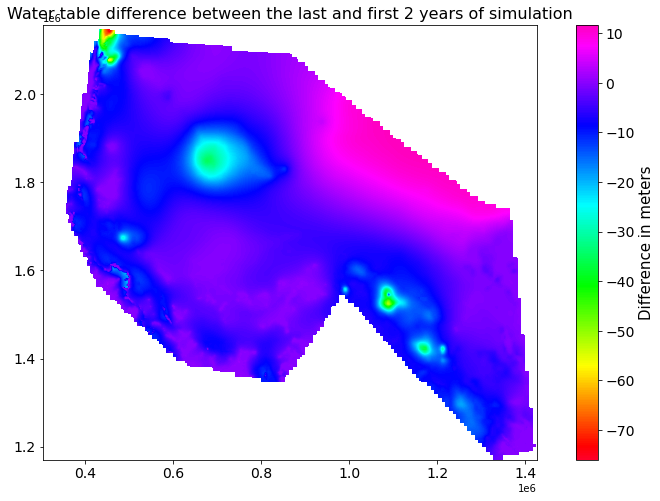

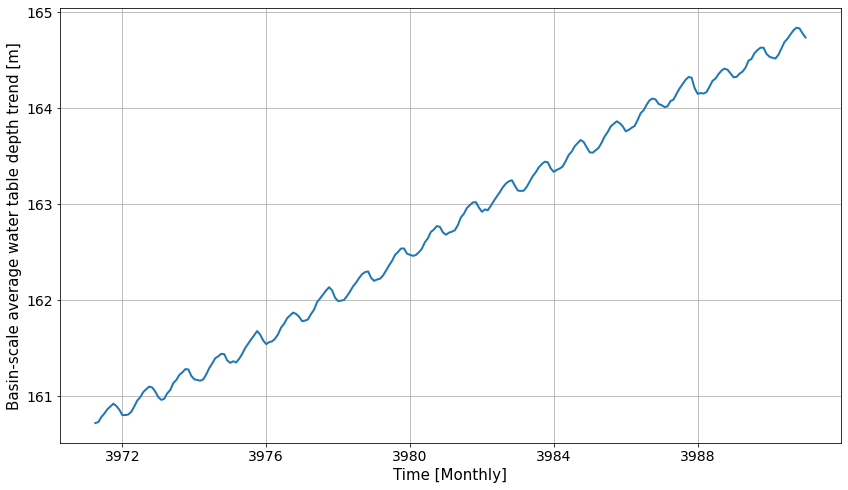

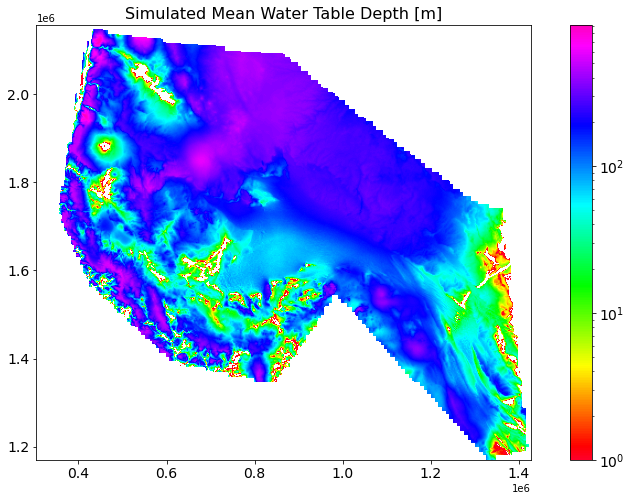

In [8]:
## Plot the water balance trend in Groundwater:
#extent = (float(Size[0])-res_ModFlow/2, float(Size[1])+res_ModFlow/2, float(Size[2])+res_ModFlow/2, float(Size[3])-res_ModFlow/2)
extent = (Size[0], Size[0]+ncol*res_ModFlow, Size[1], Size[1]-nrow*res_ModFlow)
cmap = plt.cm.gist_rainbow
fig1 = plt.figure()
# as we record water table at the end of each month 2*12 is equal to 2 yrs
plt.imshow((np.nanmean(GWTable_ModFlow[-2*12:],0)-np.nanmean(GWTable_ModFlow[0:2*12],0)), cmap=cmap,
           extent=extent, origin='lower')
plt.gca().invert_yaxis()
plt.title('Water table difference between the last and first 2 years of simulation', fontsize=16)
cb = plt.colorbar()
cb.set_label('Difference in meters', fontsize=15)
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig2 = plt.figure()
plt.plot_date(Time_ModFlowV3, np.nanmean(np.nanmean(Topography_ModFlow - GWTable_ModFlow,1),1),
             linestyle='solid', marker=None, linewidth=2)
plt.ylabel('Basin-scale average water table depth trend [m]', fontsize=15)
plt.xlabel('Time [Monthly]', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

for i in range(100):
    print(np.nanmean(np.nanmean(Topography_ModFlow - GWTable_ModFlow[i:],1),1))

## Computing the mean map of simulated water table and water table depth
MeanWaterTable = np.nanmean(GWTable_ModFlow,0)
MeanWaterTableDepth = Topography_ModFlow - MeanWaterTable

# Print the map
fig3 = plt.figure()
plt.imshow(MeanWaterTableDepth, norm=LogNorm(vmin=max(np.nanmin(MeanWaterTableDepth),1), vmax=np.nanmax(MeanWaterTableDepth)),
           cmap=cmap, extent=extent, origin='lower')
#plt.imshow(MeanWaterTableDepth, cmap=cmap, extent=extent, origin='lower')
plt.gca().invert_yaxis()
plt.title('Simulated Mean Water Table Depth [m]', fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print(np.nanmin(MeanWaterTableDepth))
print(np.nanmax(MeanWaterTableDepth))

## Uploading observed water table and find the ModFlow coordinates of each borehole

In [ ]:
## Upload observed water table depth
Measured_watertabledepth = np.zeros((382,21)) # 2D array containing measured data: 382 boreholes for Bhima, 21 dates
wb = xlrd.open_workbook(path_observed_data + "UB_GW_DataProcessed.xls")
sh = wb.sheet_by_name(u'Sheet1')
for il in range(np.shape(Measured_watertabledepth)[0]):
    for ic in range(np.shape(Measured_watertabledepth)[1]):
        val=sh.row_values(il+1)[ic]
        if val == '':
            Measured_watertabledepth[il][ic] = np.nan
        else:
            Measured_watertabledepth[il][ic] = val

## Upload associated dates
Measured_dates = np.zeros(np.shape(Measured_watertabledepth)[1])
for ic in range(np.shape(Measured_watertabledepth)[1]):
    Measured_dates[ic] = datetime(1900, 1, 1).toordinal() + int(sh.row_values(0)[ic]) - 2
    

    
## Upload coordinates, water table and topography of each borehole
x_GW = np.loadtxt(path_observed_data + 'GW_level_x.txt')
y_GW = np.loadtxt(path_observed_data + 'GW_level_y.txt')
z_GW = np.loadtxt(path_observed_data + 'GW_level_z.txt')

## List containing only boreholes in the basin and not too close from the basin limit (at least 1 cell)
x_GW_bhima = np.zeros(np.shape(Measured_watertabledepth)[0])   # Boreholes out of the basin will be removed after            
y_GW_bhima = np.zeros(np.shape(Measured_watertabledepth)[0]) 
z_GW_bhima = np.zeros(np.shape(Measured_watertabledepth)[0])
wt_GW_bhima = np.zeros((np.shape(Measured_watertabledepth)[0],np.shape(Measured_watertabledepth)[1]))                 # Observed water table
wtd_GW_bhima = np.zeros((np.shape(Measured_watertabledepth)[0],np.shape(Measured_watertabledepth)[1]))                # Observed water table depth
Sim_wtd_GW_bhima = np.zeros((np.shape(Measured_watertabledepth)[0],np.shape(Measured_watertabledepth)[1]))            # Simulated water table
Sim_wt_GW_bhima = np.zeros((np.shape(Measured_watertabledepth)[0],np.shape(Measured_watertabledepth)[1]))             # Simulated water table depth
Sim_z_GW_bhima = np.zeros(np.shape(Measured_watertabledepth)[0])              # Altitude of the cell in the model (differnt from borehole information)

## Preparing data for the linear interpolation inside the grid
X = np.arange(0, ncol)
Y = np.arange(0, nrow)
X,Y = np.meshgrid(X,Y)
points = np.array( (X.flatten(), Y.flatten()) ).T

# We assume the period April 1997 to April 2007 is included in the model
# For each date of observation, we look for the closer date of simulation
Index_measured_date = np.zeros(len(Measured_dates))
for it in range(len(Measured_dates)):
    Index_measured_date[it] = np.argmin(np.abs(Time_ModFlowV3-Measured_dates[it])) # index corresponding to the closer date

valuesWaterTable = np.zeros((np.shape(Measured_watertabledepth)[1], nrow*ncol))
valuesWaterTableDepth = np.zeros((np.shape(Measured_watertabledepth)[1], nrow*ncol))

for it in range(len(Measured_dates)): # For each measured time
    PiezoMap = GWTable_ModFlow[int(Index_measured_date[it])]
    PiezoDepthMap = Topography_ModFlow - GWTable_ModFlow[int(Index_measured_date[it])]
    valuesWaterTable[it] = PiezoMap.flatten()           # Map of the simulated water table for each date of observation
    valuesWaterTableDepth[it] = PiezoDepthMap.flatten() # Map of the simulated water table depth for each date of observation

valuesTopography_ModFlow = Topography_ModFlow.flatten() # Map of the topography defined in ModFlow

som=0
for pz in range(len(x_GW)): # For each monitoring borehole

    # Find the corresponding column and row where the borehole is located
    colPz = int(round((x_GW[pz] - float(Size[0])) / res_ModFlow))
    rowPz = int(round((float(Size[1]) - y_GW[pz]) / res_ModFlow))
    
    #colPz = int(round((x_GW[pz]-float(Size[0]))/res_ModFlow))
    #rowPz = int(round((float(Size[2])-y_GW[pz])/res_ModFlow))

    if colPz>0 and rowPz>0 and colPz<ncol and rowPz<nrow:       # If the borehole is in the model
        if basin[rowPz][colPz] == 1:         # If the borehole is in the basin

            # Interpolating the simulated value as observation points are not in the cells center
            X0 = (x_GW[pz] - float(Size[0])) / res_ModFlow
            Y0 = (float(Size[1]) - y_GW[pz]) / res_ModFlow
            
            close_points = points[np.sqrt((points[:,0]-X0)**2+(points[:,1]-Y0)**2) < 15] # all points at distance < 4 cell units
            # If the cell is not too close from an inactive cell (= too close from the basin limits)
            if 0 not in basin[close_points[:,1],close_points[:,0]]:
                som=som+1

                x_GW_bhima[som-1] = x_GW[pz]
                y_GW_bhima[som-1] = y_GW[pz]
                z_GW_bhima[som-1] = z_GW[pz]
                wtd_GW_bhima[som-1][:] = Measured_watertabledepth[pz]               # Each column corresponds to a specific date between April 1997 and April 2007
                wt_GW_bhima[som-1][:] = z_GW[pz]-Measured_watertabledepth[pz]

                # As interpolation seems to long for the Bhima, we create a new grid closer from the observation point
                points2 = points[np.sqrt((points[:,0]-X0)**2+(points[:,1]-Y0)**2) < 2]
                
                # Interpolation
                valuesTopography_ModFlow2 = valuesTopography_ModFlow[np.sqrt((points[:,0]-X0)**2+(points[:,1]-Y0)**2) < 2]
                Val = griddata(points2, valuesTopography_ModFlow2, (X0,Y0), method='linear' )
                Sim_z_GW_bhima[som-1] = Val

                compt=0
                for ii in range(len(Measured_dates)): # For each measured time

                    valuesWaterTableDepth2 = valuesWaterTableDepth[ii][np.sqrt((points[:,0]-X0)**2+(points[:,1]-Y0)**2) < 2]
                    valuesWaterTable2 = valuesWaterTable[ii][np.sqrt((points[:,0]-X0)**2+(points[:,1]-Y0)**2) < 2]
                    Val = griddata(points2, valuesWaterTableDepth2, (X0,Y0), method='linear' )
                    Sim_wtd_GW_bhima[som-1][compt] = Val
                    Val = griddata(points2, valuesWaterTable2, (X0,Y0), method='linear' )
                    Sim_wt_GW_bhima[som-1][compt] = Val
                    compt+=1

print('Number of boreholes in the Bhima basin : ', np.shape(Measured_watertabledepth)[0])            
print('Number of boreholes used for water table comparison in the selected basin : ', som)

## Keep only boreholes inside the basin and not too close from the basin limits
x_GW_bhima = x_GW_bhima[:som]       
y_GW_bhima = y_GW_bhima[:som] 
z_GW_bhima = z_GW_bhima[:som] 
wt_GW_bhima = wt_GW_bhima[:som] 
wtd_GW_bhima = wtd_GW_bhima[:som] 
Sim_wtd_GW_bhima = Sim_wtd_GW_bhima[:som] 
Sim_wt_GW_bhima = Sim_wt_GW_bhima[:som] 
Sim_z_GW_bhima = Sim_z_GW_bhima[:som]


## Computing criteria for the time average

In [ ]:
## COMPUTING ROOT MEAN SQUARE ERROR AND CORELATION BETWEEN OBSERVATION AND SIMULATION ##
## MEAN VALUE ## -> compute a global RMS error, normalized difference, normalized RMSE and coefficient of correlation

## Time averaging of simulate and observed data
Mean_Sim_wt_GW_bhima = np.mean(Sim_wt_GW_bhima,1)
Mean_Sim_wtd_GW_bhima = np.mean(Sim_wtd_GW_bhima,1)
Mean_wt_GW_bhima = np.nanmean(wt_GW_bhima,1)    # nanmean is used because there are nan values in observed data
Mean_wtd_GW_bhima = np.nanmean(wtd_GW_bhima,1)

## Correlation COEFFICIENT
PearsonWaterTable = np.corrcoef(Mean_wt_GW_bhima, Mean_Sim_wt_GW_bhima)    
CorrWaterTable = PearsonWaterTable[0][1]
PearsonWaterTableDepth = np.corrcoef(Mean_wtd_GW_bhima, Mean_Sim_wtd_GW_bhima)    
CorrWaterTableDepth = PearsonWaterTableDepth[0][1]

## MEAN Normalize water table depth difference
average_Norm_diffDepth = np.nanmean(np.abs(Mean_wtd_GW_bhima - Mean_Sim_wtd_GW_bhima)/Mean_wtd_GW_bhima*100) # In percentage
Norm_diffDepth = (Mean_wtd_GW_bhima - Mean_Sim_wtd_GW_bhima)/Mean_wtd_GW_bhima*100 # In percentage
# The 'average' criteria is always positive, we add - to indicate if simulated water levels are too deep
average_Norm_diffDepth = average_Norm_diffDepth * (np.nanmean(Norm_diffDepth)/np.abs(np.nanmean(Norm_diffDepth)))

## MEAN Root mean square error
RmseWaterTable = np.sqrt(np.sum((Mean_wt_GW_bhima - Mean_Sim_wt_GW_bhima)**2) / len(Mean_wt_GW_bhima))
RmseWaterTableDepth = np.sqrt(np.sum((Mean_wtd_GW_bhima - Mean_Sim_wtd_GW_bhima)**2) / len(Mean_wtd_GW_bhima))

## MEAN normalized Root mean square error
RmseWaterTable_norm = RmseWaterTable/np.std(Mean_wt_GW_bhima)
RmseWaterTableDepth_norm = RmseWaterTableDepth/np.std(Mean_wtd_GW_bhima)


## Plot of the time average comparison

In [ ]:
## Plot the basin map with scatter showing discrepancy in Water Table Depth
fig4 = plt.figure()
Topo = np.copy(Topography_ModFlow)
Topo[np.isnan(MeanWaterTable)] = np.nan
plt.imshow(Topo, cmap='copper', alpha=0.7, extent=extent, origin='lower')
plt.gca().invert_yaxis()
plt.title('Mean Water Table Depth Comparison at several boreholes', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(x_GW_bhima, y_GW_bhima, c=Norm_diffDepth, s=50)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label('Water Table Depth Difference [%]\n(<0 if too deep)', fontsize=15)
cb.ax.tick_params(labelsize=14)



## Plot time-averaged results for water table comparison
fig5 = plt.figure()
# Print the perfect line 1/1
plt.plot([np.nanmin(Mean_wt_GW_bhima),np.nanmax(Mean_wt_GW_bhima)],[np.nanmin(Mean_wt_GW_bhima),np.nanmax(Mean_wt_GW_bhima)], linestyle='solid', linewidth=2, marker=None)
label1 = ' Pearson correlation coefficient : ' + str(round(CorrWaterTable*100)/100) + '\n RMSE [m] : ' + str(round(RmseWaterTable*100)/100) + '\n Normalized RMSE: ' + str(round(RmseWaterTable_norm*100)/100) 
plt.plot(Mean_wt_GW_bhima, Mean_Sim_wt_GW_bhima, marker='o', markersize=10, color='r', linestyle='')
plt.text(np.nanmin(Mean_wt_GW_bhima), np.nanmax(Mean_wt_GW_bhima)-100, label1, fontsize=15,
        bbox=dict(facecolor='white', alpha=0.5), linespacing=2)
plt.xlabel('Measured Mean Water Table [m]', fontsize=16)
plt.ylabel('Simulated Mean Water Table [m]', fontsize= 16)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


import plotly.graph_objects as go
fig = go.Figure()
    
fig.add_trace(go.Scatter(y=Mean_Sim_wt_GW_bhima,
                         x=Mean_wt_GW_bhima,
                         mode = 'markers',
                name='Observed'))
fig.add_trace(go.Scatter(x=[np.nanmin(Mean_wt_GW_bhima),np.nanmax(Mean_wt_GW_bhima)],
                         y=[np.nanmin(Mean_wt_GW_bhima),np.nanmax(Mean_wt_GW_bhima)],
                         mode = 'lines'
                             
))



fig.update_layout(title= 'Water table fluctuations (average across all wells)',
                   xaxis_title='Measured time-averaged water table depth [m]',
                   yaxis_title='Simulated time-averaged water table depth [m]', template='plotly_dark')
 
fig.show()

## Plot time-averaged results for water table depth comparison
fig6 = plt.figure()
# Print the perfect line 1/1
plt.plot([np.nanmin(Mean_wtd_GW_bhima),np.nanmax(Mean_wtd_GW_bhima)],[np.nanmin(Mean_wtd_GW_bhima),np.nanmax(Mean_wtd_GW_bhima)], linestyle='solid', linewidth=2, marker=None)
label2 = ' Mean difference [%] : ' + str(round(average_Norm_diffDepth*100)/100) + '\n Pearson correlation coefficient : ' + str(round(CorrWaterTableDepth*100)/100) + '\n RMSE [m] : ' + str(round(RmseWaterTableDepth*100)/100) + '\n Normalized RMSE: ' + str(round(RmseWaterTableDepth_norm*100)/100) 
plt.plot(Mean_wtd_GW_bhima, Mean_Sim_wtd_GW_bhima, marker='o', markersize=10, color='r', linestyle='')
plt.text(np.nanmin(Mean_wtd_GW_bhima), np.nanmax(Mean_Sim_wtd_GW_bhima)-30, label2, fontsize=15,
        bbox=dict(facecolor='white', alpha=0.5), linespacing=2)
plt.xlabel('Measured time-averaged water table depth [m]', fontsize= 16)
plt.ylabel('Simulated time-averaged water table depth [m]', fontsize= 16)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


## Comparing Water Table fluctuations

In [ ]:
## COMPUTING ROOT MEAN SQUARE ERROR AND CORELATION BETWEEN OBSERVATION AND SIMULATION ##
## TRANSIENT VALUE ## -> compute nRMSE for each borehole, after subtracting the mean as the mean behavior is already compared by other criteria

## Computing normalized root mean square error on water table fluctuations for each borehole
Transient_nRMSE = np.zeros(len(wt_GW_bhima))
for ib in range(len(wt_GW_bhima)): # For each borehole
    Transient_nRMSE[ib] = np.sqrt(np.nansum((wt_GW_bhima[ib]-np.nanmean(wt_GW_bhima[ib])-(Sim_wt_GW_bhima[ib]-np.nanmean(Sim_wt_GW_bhima[ib])))**2) / np.count_nonzero(~np.isnan(wt_GW_bhima[ib]))) / np.nanstd(wt_GW_bhima[ib])

## Mean value of the nRMSE in transient
wt_fluctu = np.zeros((len(wt_GW_bhima),len(Measured_dates)))
Sim_wt_fluctu = np.zeros((len(wt_GW_bhima),len(Measured_dates)))
for ib in range(len(wt_GW_bhima)): # for each borehole, remove the mean
    wt_fluctu[ib] = wt_GW_bhima[ib]-np.nanmean(wt_GW_bhima[ib])
    Sim_wt_fluctu[ib] = Sim_wt_GW_bhima[ib]-np.nanmean(Sim_wt_GW_bhima[ib])

Average_transient_nRMSE = np.sqrt(np.nansum((np.nanmean(wt_fluctu, 0)-np.nanmean(Sim_wt_fluctu, 0))**2) / np.count_nonzero(~np.isnan(np.nanmean(wt_fluctu, 0)))) / np.nanstd(np.nanmean(wt_fluctu, 0))

# Optimize curve fitting with a sinus, to compare the seasonal amplitude
from scipy import optimize
from scipy import signal

x_data = np.linspace(1,len(Measured_dates),len(Measured_dates))
periode_annuel = 12 # Because we are at monthly timestep

def sin_func(x, ampli, phase):
    ff = np.abs(ampli) * np.sin(2*np.pi/periode_annuel * x + phase)
    return ff

params_mean_wt_fluctu, params_covariance = optimize.curve_fit(sin_func, x_data, signal.detrend(np.nanmean(wt_fluctu, 0)), p0=[1, 5])
params_mean_Sim_wt_fluctu, params_covariance = optimize.curve_fit(sin_func, x_data, signal.detrend(np.nanmean(Sim_wt_fluctu, 0)), p0=[1, 5])
seasonal_amplitude_difference = -2 * (params_mean_wt_fluctu[0]-params_mean_Sim_wt_fluctu[0])

Average_transient_nRMSE = Average_transient_nRMSE * (seasonal_amplitude_difference/np.abs(seasonal_amplitude_difference))
# thus the critria is > 0 when the simulated fluctuations are not high

## Plot the Transient_nRMSE in function of normalized difference between water table depth
fig7 = plt.figure()
plt.scatter(Norm_diffDepth, Transient_nRMSE, marker='o', s=30)
plt.xlabel('Normalized time-averaged water table depth difference [%]', fontsize= 16)
plt.ylabel('Normalized root mean square error on water table fluctuations', fontsize= 16)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


## Plot the best 3 boreholes for water table fluctuations
sorted_Transient_nRMSE = np.argsort(Transient_nRMSE)
for i in range(10):
    plt.figure()
    plt.plot_date(Measured_dates, wt_GW_bhima[sorted_Transient_nRMSE[i]]-np.nanmean(wt_GW_bhima[sorted_Transient_nRMSE[i]]), label='Observed water table fluctuations [m]', linestyle='solid', marker=None, linewidth=2, color='k')
    plt.plot_date(Measured_dates, Sim_wt_GW_bhima[sorted_Transient_nRMSE[i]]-np.nanmean(Sim_wt_GW_bhima[sorted_Transient_nRMSE[i]]), label='Simulated water table fluctuations [m]', linestyle='solid', marker=None, linewidth=2, color='r')
    plt.grid()
    plt.legend(fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time [monthly]', fontsize=14)
    plt.ylabel('Water Table fluctuations (best boreholes)', fontsize=14)
    txt_title = 'Transient nRMSE on Water Table Fluctuations : ' + str(np.round(Transient_nRMSE[sorted_Transient_nRMSE[i]]*100)/100)
    plt.title(txt_title, fontsize=15)


In [ ]:
## Plot the mean storage fluctuations at boreholes,

# Plot the results from the model and from the observed data
fig11 = plt.figure()
plt.plot_date(Measured_dates, np.nanmean(wt_fluctu, 0), label='Observed water table fluctuations [m]', linestyle='solid', marker=None, linewidth=2, color='k')
plt.plot_date(Measured_dates, np.nanmean(Sim_wt_fluctu, 0), label='Simulated water table fluctuations [m]', linestyle='solid', marker=None, linewidth=2, color='r')
plt.grid()
plt.legend(fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time [monthly]', fontsize=14)
plt.ylabel('Water Table fluctuations (average across all boreholes) [m]', fontsize=14)
txt_title = 'Normalized root mean square error on water table fluctuations (average across all boreholes) : ' + str(np.round(Average_transient_nRMSE*100)/100)
plt.title(txt_title, fontsize=15)
from datetime import datetime
import plotly.graph_objects as go
fig = go.Figure()
Measured_dates_ex = []
for ic in range(np.shape(Measured_watertabledepth)[1]):
    proper_date = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(sh.row_values(0)[ic]) - 2)
    Measured_dates_ex.append(proper_date)
    
fig.add_trace(go.Scatter(y=np.nanmean(wt_fluctu, 0),
                         x=Measured_dates_ex,
                mode='lines',
                name='Observed'))

fig.add_trace(go.Scatter(y=np.nanmean(Sim_wt_fluctu, 0),
                         x=Measured_dates_ex,
                mode='lines',
                name='Simulated'))

fig.update_layout(title= 'Water table fluctuations (average across all wells)',
                   xaxis_title='Month',
                   yaxis_title='Water Table fluctuations [m]', template='plotly_dark')
 
fig.show()

In [ ]:
import matplotlib.backends.backend_pdf
print(plt.figure().number)
pdf = matplotlib.backends.backend_pdf.PdfPages(path_model_outputs + r"\GW_output.pdf")
pdf.savefig(fig1)
pdf.savefig(fig2)
pdf.savefig(fig3)
pdf.savefig(fig4)
pdf.savefig(fig5)
pdf.savefig(fig6)
pdf.savefig(fig7)
pdf.savefig(fig11)
pdf.close()

In [ ]:
"""
for i in range(25):
    plt.figure()
    plt.plot_date(Measured_dates, wt_GW_bhima[sorted_Transient_nRMSE[i]], label='Observed water table [m]', linestyle='solid', marker=None, linewidth=2, color='k')
    plt.plot_date(Measured_dates, Sim_wt_GW_bhima[sorted_Transient_nRMSE[i]], label='Simulated water table [m]', linestyle='solid', marker=None, linewidth=2, color='r')
    plt.grid()
    plt.legend(fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time [monthly]', fontsize=14)
    plt.ylabel('Water Table fluctuations (best boreholes)', fontsize=14)
    txt_title = 'Transient nRMSE on Water Table Fluctuations : ' + str(np.round(Transient_nRMSE[sorted_Transient_nRMSE[i]]*100)/100)
    plt.title(txt_title, fontsize=15)
"""

import plotly.express as px

print(px.colors.qualitative.Plotly)

import plotly.graph_objects as go
fig = go.Figure()
for i in range(1, 10):
    fig.add_trace(go.Scatter(y=wt_GW_bhima[sorted_Transient_nRMSE[i]],
                             x=Measured_dates_ex,
                    mode='lines',
                    name='Observed '+str(i), line=dict(color = px.colors.qualitative.Plotly[i])))

    fig.add_trace(go.Scatter(y=Sim_wt_GW_bhima[sorted_Transient_nRMSE[i]],
                             x=Measured_dates_ex,
                    mode='lines',
                    name='Simulated ' +str(i),  line = dict(color = px.colors.qualitative.Plotly[i], dash='dot')))
"""
for i in range(10,20):
    fig.add_trace(go.Scatter(y=wt_GW_bhima[sorted_Transient_nRMSE[i]],
                             x=Measured_dates_ex,
                    mode='lines',
                    name='Observed '+str(i), line=dict(color = px.colors.qualitative.Bold[i-10])))

    fig.add_trace(go.Scatter(y=Sim_wt_GW_bhima[sorted_Transient_nRMSE[i]],
                             x=Measured_dates_ex,
                    mode='lines',
                    name='Simulated ' +str(i),  line = dict(color = px.colors.qualitative.Bold[i-10], dash='dot')))
        
"""
fig.update_layout(title= 'Water table elevation',
                   xaxis_title='Month',
                   yaxis_title='Water table elevation [m]',template='plotly_dark')
fig.show()

#### 